In [1]:
import os
import glob
import yaml
import cv2
import matplotlib as mpl
mpl.use('nbagg')

import importlib

import _pickle as pkl

import numpy as np
import scipy as sp
import pandas as pd

import seaborn as sns
import pylab as pl

In [2]:
import plotting as putil
import dlc as dlc

In [3]:
plot_style='dark'
putil.set_sns_style(style=plot_style)
bg_color='w' if plot_style=='dark' else 'k'

In [4]:
%matplotlib notebook

In [5]:
# import sys
# !conda install --yes --prefix {sys.prefix} tables

In [6]:
#rootdir = '/mnt/minerva/courtship-free-behavior/maDLCv2' #maDLCv2'
rootdir = '/Volumes/Julie/courtship-free-behavior/maDLCv2' #maDLCv2'
projectname = 'MMFv2'

experiment = 'MF-20mm-cantons-RL'
projectdir = os.path.join(rootdir, projectname) 

# load config file
cfg_fpath = os.path.join(projectdir, 'config.yaml')
with open(cfg_fpath, "r") as f:
    cfg = yaml.load(f, Loader=yaml.SafeLoader)

# get list of tracked files
srcdir = os.path.join(projectdir, experiment)
suffix = 'el_IDcorrected'
tracked_files = glob.glob(os.path.join(srcdir, '*', '*_{}.h5'.format(suffix)))
print(len(tracked_files))

# Figure dir
figdir = os.path.join(rootdir, 'figures')
figid = srcdir
print(figid)
if not os.path.exists(figdir):
    os.makedirs(figdir)

13
/Volumes/Julie/courtship-free-behavior/maDLCv2/MMFv2/MF-20mm-cantons-RL


# Select 1 dataset

In [7]:
fn = tracked_files[0]
curr_figid = os.path.splitext(os.path.split(fn)[-1])[0]

print(fn)

df0 = pd.read_hdf(fn)
df0.head()

/Volumes/Julie/courtship-free-behavior/maDLCv2/MMFv2/MF-20mm-cantons-RL/MF_030122_3/030122_Canton-S_age5_m_sh_f_gh_3DLC_dlcrnetms5_MMFv2Sep27shuffle1_200000_el_IDcorrected.h5


scorer      DLC_dlcrnetms5_MMFv2Sep27shuffle1_200000                       \
individuals                                     ind1                        
bodyparts                                    headTop                        
coords                                             x         y likelihood   
0                                            818.259  1094.121        1.0   
1                                            824.415  1086.117        1.0   
2                                            824.547  1081.190        1.0   
3                                            826.187  1076.055        1.0   
4                                            833.067  1075.237        1.0   

scorer                                                                         \
individuals                                                                     
bodyparts   thoraxCenter                      abdomenTop                        
coords                 x         y likelihood          x         y likelihood   
0                760.900  1078.966        1.0    739.500  1075.218        1.0   
1                767.248  1076.957        1.0    747.451  1071.435        1.0   
2                767.096  1072.299        1.0    749.076  1070.026        1.0   
3                771.710  1070.204        1.0    751.130  1065.949        1.0   
4                776.409  1071.546        1.0    753.440  1067.496        1.0   

scorer                     ...                                           \
individuals                ...        ind2                                
bodyparts   abdomenCenter  ... hindlegLeft hindlegRightJoint1             
coords                  x  ...  likelihood                  x         y   
0                 707.038  ...         1.0           1179.064  1091.572   
1                 713.780  ...         1.0           1179.209  1079.942   
2                 716.217  ...         1.0           1178.925  1066.698   
3                 715.125  ...         1.0           1173.835  1056.211   
4                 716.815  ...         1.0           1177.834  1019.732   

scorer                                                                       \
individuals                                                                   
bodyparts              hindlegRightJoint2                      hindlegRight   
coords      likelihood                  x         y likelihood            x   
0                  1.0           1177.358  1114.252        1.0     1194.526   
1                  1.0           1180.366  1114.151        1.0     1194.306   
2                  1.0           1181.617  1108.241        1.0     1194.751   
3                  1.0           1180.805  1100.845        1.0     1196.704   
4                  1.0           1182.196  1045.046        1.0     1194.969   

scorer                            
individuals                       
bodyparts                         
coords              y likelihood  
0            1169.741        1.0  
1            1169.870        1.0  
2            1169.028        1.0  
3            1159.887        1.0  
4            1095.543        1.0  

[5 rows x 174 columns]

In [8]:
df0.xs('ind1', level='individuals', axis=1)

scorer    DLC_dlcrnetms5_MMFv2Sep27shuffle1_200000                       \
bodyparts                                  headTop                        
coords                                           x         y likelihood   
0                                          818.259  1094.121        1.0   
1                                          824.415  1086.117        1.0   
2                                          824.547  1081.190        1.0   
3                                          826.187  1076.055        1.0   
4                                          833.067  1075.237        1.0   
...                                            ...       ...        ...   
15113                                          NaN       NaN        1.0   
15114                                          NaN       NaN        1.0   
15115                                          NaN       NaN        1.0   
15116                                          NaN       NaN        1.0   
15117                                          NaN       NaN        1.0   

scorer                                                                       \
bodyparts thoraxCenter                      abdomenTop                        
coords               x         y likelihood          x         y likelihood   
0              760.900  1078.966      1.000    739.500  1075.218      1.000   
1              767.248  1076.957      1.000    747.451  1071.435      1.000   
2              767.096  1072.299      1.000    749.076  1070.026      1.000   
3              771.710  1070.204      1.000    751.130  1065.949      1.000   
4              776.409  1071.546      1.000    753.440  1067.496      1.000   
...                ...       ...        ...        ...       ...        ...   
15113          476.047   315.294      1.000    452.012   346.961      0.987   
15114          482.752   324.337      0.995    484.598   323.493      0.931   
15115          476.171   324.612      0.853    454.922   345.779      0.802   
15116          477.521   328.313      0.878    482.701   323.704      0.710   
15117          484.047   330.397      0.952    455.702   341.973      0.918   

scorer                   ...                                           \
bodyparts abdomenCenter  ... hindlegLeft hindlegRightJoint1             
coords                x  ...  likelihood                  x         y   
0               707.038  ...         1.0            679.550  1094.314   
1               713.780  ...         1.0            681.432  1095.734   
2               716.217  ...         1.0            687.485  1096.777   
3               715.125  ...         1.0            693.917  1097.394   
4               716.815  ...         1.0            723.799  1099.669   
...                 ...  ...         ...                ...       ...   
15113           461.067  ...         1.0            476.725   408.115   
15114           461.923  ...         1.0            476.395   410.913   
15115           461.329  ...         1.0            474.599   409.047   
15116           460.158  ...         1.0            473.946   407.776   
15117           459.908  ...         1.0            484.018   392.635   

scorer                                                                     \
bodyparts            hindlegRightJoint2                      hindlegRight   
coords    likelihood                  x         y likelihood            x   
0                1.0            646.173  1090.464        1.0      585.665   
1                1.0            647.076  1088.990        1.0      585.871   
2                1.0            651.587  1092.158        1.0      586.960   
3                1.0            656.688  1089.030        1.0      600.999   
4                1.0            689.187  1109.429        1.0      635.558   
...              ...                ...       ...        ...          ...   
15113            1.0                NaN       NaN        1.0          NaN   
15114            1.0                NaN       NaN

## video frames

In [9]:
#meta_fpath = '/Users/julianarhee/DeepLabCut/bandensis-dyad-jyr-2022-07-22/videos/NINJAV_S001_S001_T034_008_cDLC_dlcrnetms5_bandensis-dyadJul22shuffle1_50000_meta.pickle'
model_prefix = 'DLC_dlcrnetms5_'
scorer = df0.columns[0]
fbase = fn.split(model_prefix)[0]
movie_fmt = 'avi'
video_fpath = '{}.{}'.format(fbase, movie_fmt) #esults_fpath.replace('%s_el.h5' % scorer, '.mp4')
assert os.path.exists(video_fpath), "Could not find corresponding video: {}".format(video_fpath)
cap = cv2.VideoCapture(video_fpath)

<IPython.core.display.Javascript object>


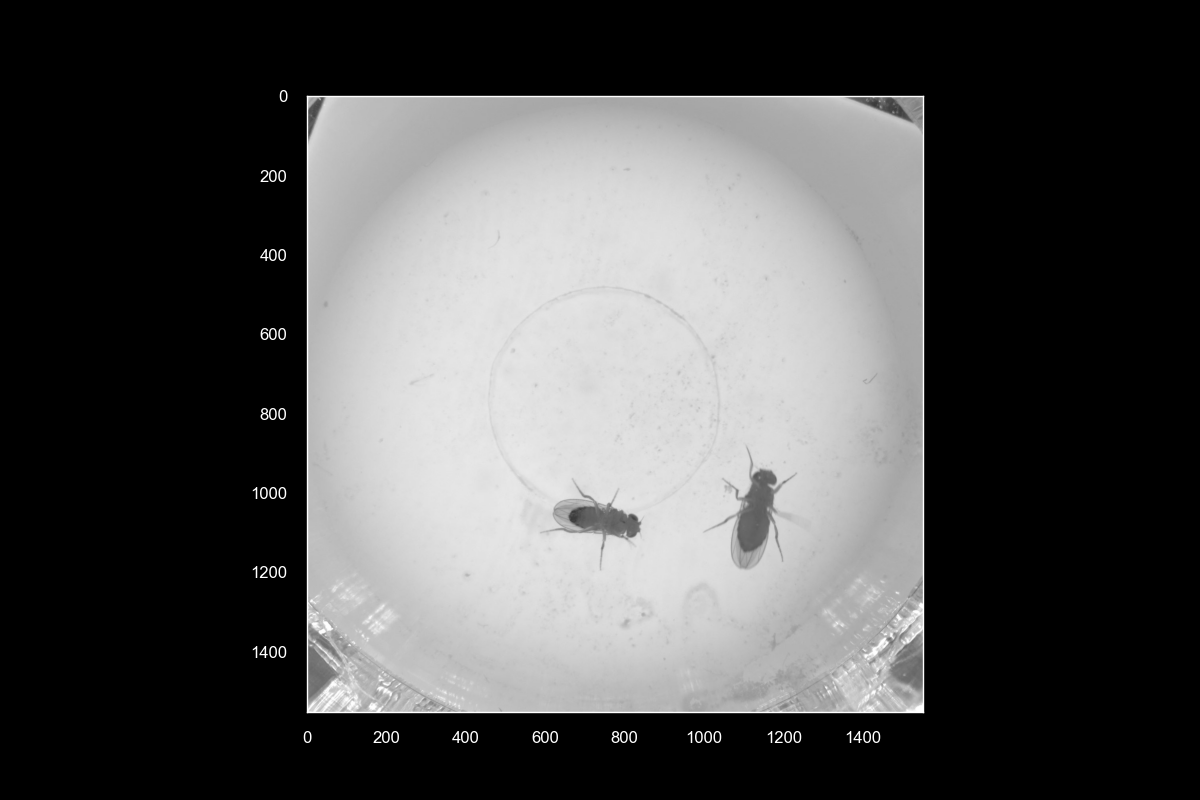

In [10]:
frame_ix=1
cap.set(1, frame_ix)
ret, im = cap.read()
pl.figure()
pl.imshow(im)

## Get body part indices

In [11]:
bodyparts2connect = cfg["skeleton"]

bodyparts2plot = set(df0.columns.get_level_values("bodyparts"))
individuals = set(df0.columns.get_level_values("individuals"))

n_bodyparts = len(np.unique(df0.columns.get_level_values("bodyparts")[::3]))
print(n_bodyparts)
all_bpts = df0.columns.get_level_values("bodyparts")[::3][0:n_bodyparts]

29


In [12]:
# original indices specified in cfg file:
inds_og  = dlc.get_segment_indices(bodyparts2connect, all_bpts)
# create a skeleton connector for abdomen only
abdomen_pts = ['abdomenTop', 'abdomenLeft', 'abdomenLowerLeft', 'genitalia', 'abdomenLowerRight', 'abdomenRight']
abdomen_pts_tmp = abdomen_pts.copy()
abdomen_pts_tmp.append(abdomen_pts[0])
abdomen2connect = [[v, abdomen_pts_tmp[i+1]] for i, v in enumerate(abdomen_pts_tmp[0:-1])]
# get indices
inds_ab = dlc.get_segment_indices(abdomen2connect, all_bpts)

In [13]:
# colors = visualization.get_cmap(len(bodyparts2plot), name=cfg["colormap"])
pcutoff=0.01
animal_colors={'ind1': 'm', 'ind2': 'c'}
alphavalue=1
skeleton_edges=bodyparts2connect
skeleton_color=bg_color
bg_color

'w'

#### plot 1 frame

<IPython.core.display.Javascript object>


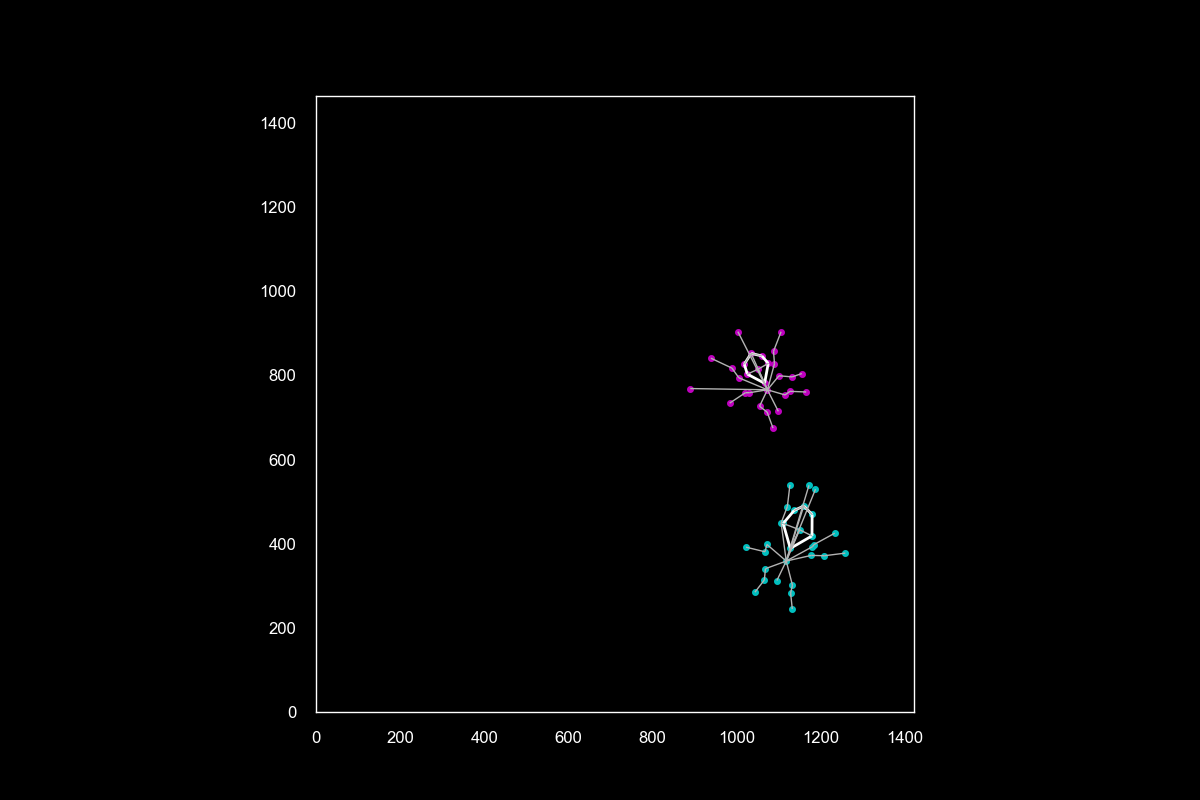

In [14]:
skeleton_color0 = [0.7]*3
markersize=3
skeleton_lw=0.5
lw=1

inds = inds_ab.copy()
fig, ax = pl.subplots()
bodyparts2plot = set(df0.columns.get_level_values("bodyparts"))
individuals = set(df0.columns.get_level_values("individuals"))
ix=50
for ind2plot in individuals:
    curr_col = animal_colors[ind2plot]
    df = df0.loc(axis=1)[:, ind2plot]
    for bpindex, bp in enumerate(bodyparts2plot):
        prob = df.xs(
            (bp, "likelihood"), level=(-2, -1), axis=1
        ).values.squeeze()
        mask = prob < pcutoff
        temp_x = np.ma.array(
            df.xs((bp, "x"), level=(-2, -1), axis=1).values.squeeze(),
            mask=mask,
        )
        temp_y = np.ma.array(
            df.xs((bp, "y"), level=(-2, -1), axis=1).values.squeeze(),
            mask=mask,
        )
        ax.plot(temp_x[ix], temp_y[ix], ".", color=curr_col, alpha=alphavalue, markersize=markersize)

    nx = int(np.nanmax(df.xs("x", axis=1, level="coords")))
    ny = int(np.nanmax(df.xs("y", axis=1, level="coords")))

    n_frames = df.shape[0]
    xyp = df.values.reshape((n_frames, -1, 3))
    coords = xyp[ix, :, :2]
    coords[xyp[ix, :, 2] < pcutoff] = np.nan
    segs = coords[tuple(zip(*tuple(inds))), :].swapaxes(0, 1) if inds else []
    coll = mpl.collections.LineCollection(segs, colors=skeleton_color, alpha=alphavalue, lw=lw)
    # plot
    ax.add_collection(coll)
    
    segs0 = coords[tuple(zip(*tuple(inds_og))), :].swapaxes(0, 1) if inds_og else []
    col0 = mpl.collections.LineCollection(segs0, colors=skeleton_color0, alpha=alphavalue, lw=skeleton_lw)
    ax.add_collection(col0)
    # axes
    ax.set_xlim(0, nx)
    ax.set_ylim(0, ny)
    ax.set_aspect(1)

# Quantify foreleg events

In [15]:
from shapely.geometry import Point, MultiPoint
# from shapely.geometry.polygon import Polygon

In [16]:
# abdomnen indices
# inds_ab = get_segment_indices(abdomen2connect, all_bpts)
# male/female IDs
male_id = 'ind1' # magenta | MALE
female_id = 'ind2' # cyan | FEMALE
df_m = df0.loc(axis=1)[:, male_id]
df_f = df0.loc(axis=1)[:, female_id]
n_frames = df_m.shape[0]

In [17]:
# get male's foreleg positions 
d_list = []
for leg_id in ['forlegLeft', 'forlegRight']:
    coords = df_m.xs(leg_id, level='bodyparts', axis=1).to_numpy() #[:, 0:]
    df_ = pd.DataFrame(data=coords, columns=['x', 'y', 'prob'], index=df_m.xs(leg_id, level='bodyparts', axis=1).index.tolist())
    df_['leg_id'] = 0 if leg_id=='forlegLeft' else 1
    d_list.append(df_)
legdf = pd.concat(d_list, axis=0)    

legdf.head()

,x,y,prob,leg_id
0,807.044,1073.133,1.000,0
1,806.071,1068.257,1.000,0
2,812.566,1068.153,0.998,0
3,812.565,1057.885,0.998,0
4,812.551,1057.775,0.999,0


In [18]:
# coords for female
xyp = df_f.values.reshape((n_frames, -1, 3))
d_list = []
for ix, df_ in legdf.iterrows():
    if df_['prob']>=pcutoff:
        # coords
        coords = xyp[ix, :, :2]
        # make polygon
        cc = coords[np.unique(inds), :]
        if not np.isnan(cc).any(): #cc.all():
            poly = dlc.polygon_from_coords(cc) #coords, inds_ab)
            # get foreleg pos
            point = Point(df_['x'], df_['y']) #[0], forleg_coords[1])
            is_inside = poly.contains(point)
            multiplier = -1 if is_inside else 1 # if inside, make negative for sorting
            d_ = pd.DataFrame({
                'distance': poly.exterior.distance(point) * multiplier,
                'is_inside': is_inside,
                'leg_id': df_['leg_id'],
                'frame': ix
            }, index=[ix])
            d_list.append(d_)
distdf = pd.concat(d_list).reset_index(drop=True)

<IPython.core.display.Javascript object>


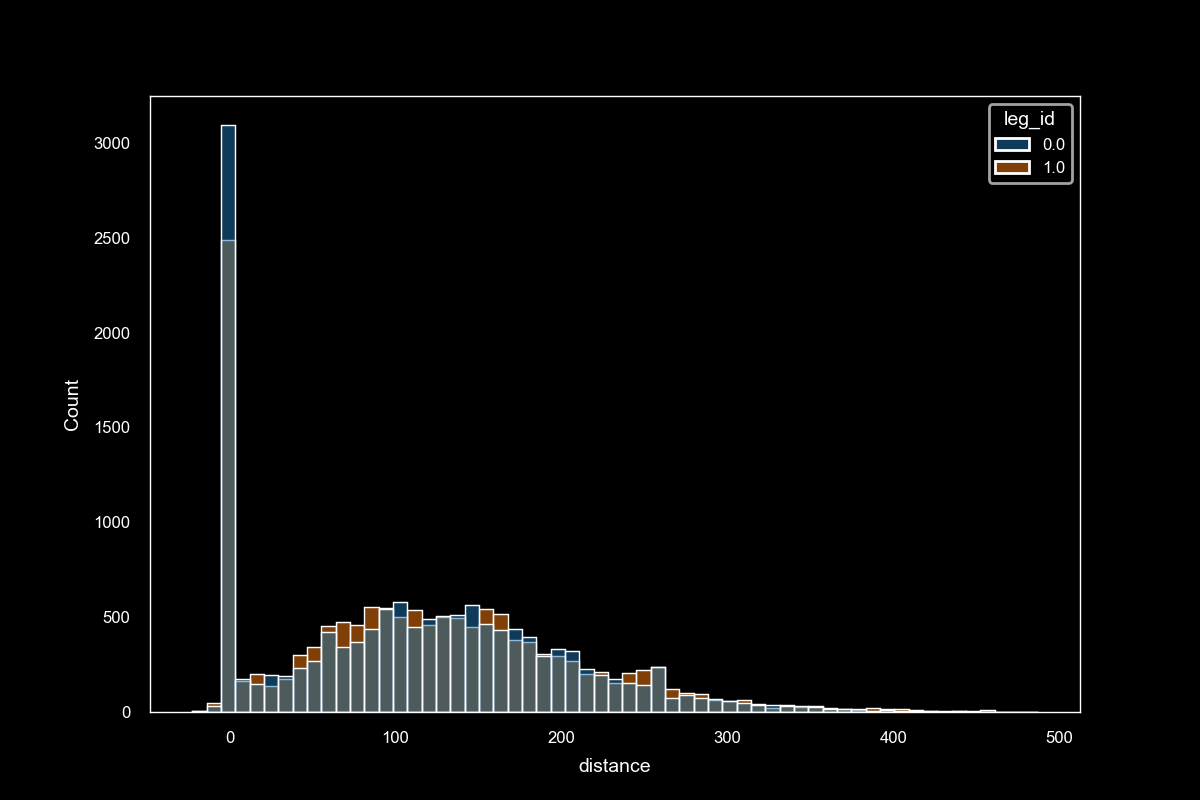

In [19]:
fig, ax = pl.subplots()
sns.histplot(data=distdf, x='distance', hue='leg_id', ax=ax)
pl.show()

#### threshold taps

In [20]:
#min_tap_dist=1
#taps = distdf[(distdf['distance']<=min_tap_dist) ].copy()
tap_thresh_upper = 15
tap_thresh_lower = 0
taps = distdf[(~distdf['is_inside']) 
              & (distdf['distance']<=tap_thresh_upper) & (distdf['distance']>=tap_thresh_lower)].copy()
closest_tap = taps.loc[taps.groupby('frame')['distance'].idxmin()]
sorted_taps = closest_tap.sort_values(by='distance', ascending=False)
print(sorted_taps.shape)
sorted_taps.head()

(3728, 4)


,distance,is_inside,leg_id,frame
8788,14.994139,False,0.0,9329
19388,14.994132,False,1.0,5787
19386,14.961326,False,1.0,5785
9358,14.910941,False,0.0,9918
6387,14.848243,False,0.0,6837


#### plot

In [21]:
# pcutoff=0.9 # keep this value HIGH, only include points that the network is confident about 
# alphavalue=0.25
# markersize=2

# nr=4
# nc=6
# figname = 'outside-min-{}-max-{}-n{}'.format(tap_thresh_lower, tap_thresh_upper, nr*nc)

# fig, axn = pl.subplots(nr, nc, figsize=(nc*2, nr*2))
# for ai, (ix, df_) in enumerate(sorted_taps.iterrows()):
#     frame_ix = df_['frame']
#     if ai>=(nr*nc):
#         break
#     ax=axn.flat[ai]
#     cap.set(1, frame_ix)
#     ret, im = cap.read()
#     im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY) #COLOR_BGR2RGB)
#     ax.imshow(im, cmap='gray')
#     # skeletons
#     for ind2plot in individuals:
#         currcol = animal_colors[ind2plot]
#         df = df0.loc(axis=1)[:, ind2plot]
#         # plot bodyparts
#         putil.plot_bodyparts(df, frame_ix, bodyparts2plot, ax=ax, pcutoff=pcutoff,
#                              color=currcol, alpha=alphavalue, markersize=markersize)
#         # get current frame coords
#         xyp = dlc.get_valid_coords(df, pcutoff=pcutoff)
#         coords = xyp[frame_ix]
#         # plot skeletons
#         putil.plot_skeleton(coords, inds=inds_ab, ax=ax, color=skeleton_color, alpha=alphavalue, lw=lw)
#         putil.plot_skeleton(coords, inds=inds_og, ax=ax, color=skeleton_color, alpha=alphavalue, lw=skeleton_lw)
#     # axes
#     nx = int(np.nanmax(df0.xs("x", axis=1, level="coords").loc[frame_ix]))
#     ny = int(np.nanmax(df0.xs("y", axis=1, level="coords").loc[frame_ix]))
#     nx_min = int(np.nanmin(df0.xs("x", axis=1, level="coords").loc[frame_ix]))
#     ny_min = int(np.nanmin(df0.xs("y", axis=1, level="coords").loc[frame_ix]))
#     ax.set_xlim(nx_min, nx)
#     ax.set_ylim(ny_min, ny)
#     ax.set_aspect(1)
#     ax.axis('off')
#     ax.set_title('{}. d={:.2f}'.format(frame_ix, df_['distance']), loc='left', fontsize=6)
# pl.tight_layout()

# figpath = os.path.join(figdir, '{}_frames.png'.format(figname))
# pl.savefig(figpath) #curr_figid
# print(figpath)

In [1]:
mm_per_pix = 20/1552
mm_per_pix*10

0.12886597938144329

## look at 1 frame

<IPython.core.display.Javascript object>


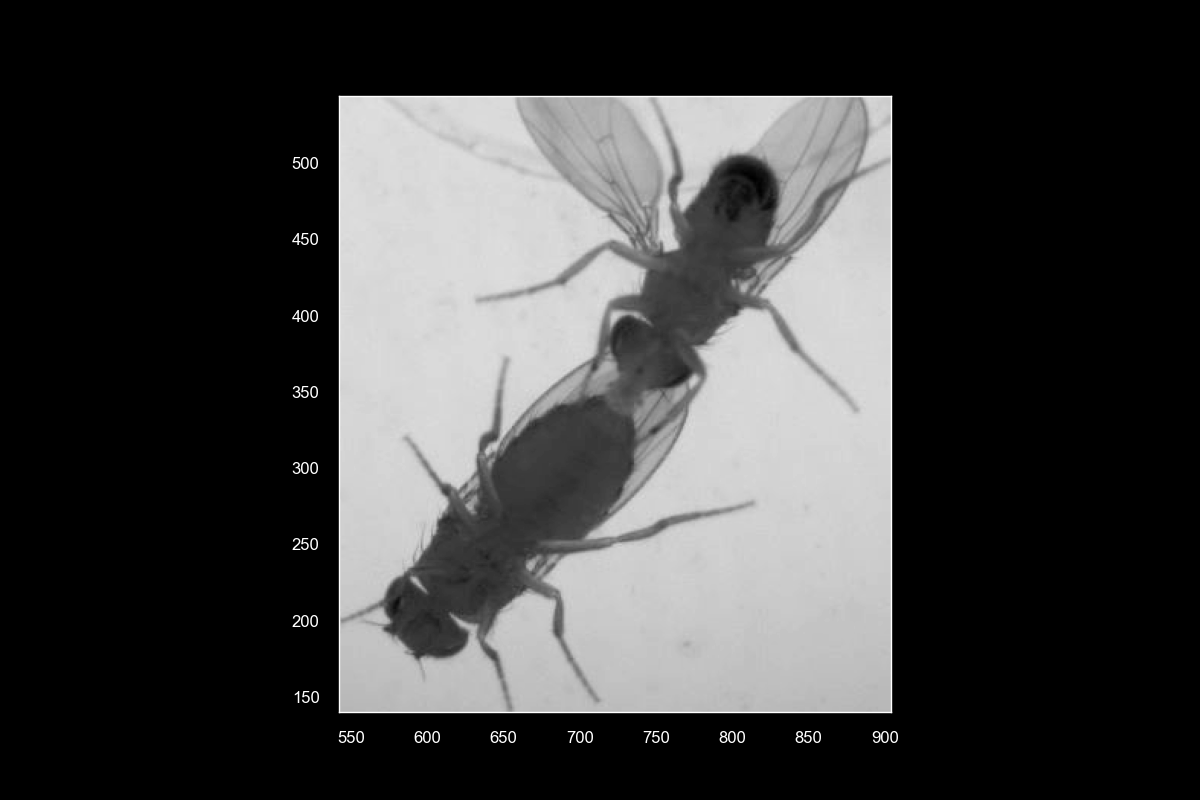

(140.0, 544.0)

In [23]:
frame_ix = 9347
#df0.loc(axis=1)[:, ind2plot]
fig, ax= pl.subplots()
cap.set(1, frame_ix)
ret, im = cap.read()
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY) #COLOR_BGR2RGB)
ax.imshow(im, cmap='gray')

nx = int(np.nanmax(df0.xs("x", axis=1, level="coords").loc[frame_ix]))
ny = int(np.nanmax(df0.xs("y", axis=1, level="coords").loc[frame_ix]))
nx_min = int(np.nanmin(df0.xs("x", axis=1, level="coords").loc[frame_ix]))
ny_min = int(np.nanmin(df0.xs("y", axis=1, level="coords").loc[frame_ix]))
ax.set_xlim(nx_min, nx)
ax.set_ylim(ny_min, ny)

# Taps & Grabs

In [24]:
leg0 = distdf[(distdf['leg_id']==0) & (distdf['distance']<tap_thresh_upper)]
leg1 = distdf[(distdf['leg_id']==1) & (distdf['distance']<tap_thresh_upper)]

both_touching = np.intersect1d(leg0['frame'], leg1['frame'])
one_touching = np.array([i for i in np.union1d(leg0['frame'], leg1['frame']) if i not in both_touching])


In [25]:
sorted_one_touch = distdf[distdf['frame'].isin(one_touching)].copy().sort_values(by='distance', ascending=False)
sorted_one_touch.shape

sorted_two_touch = distdf[distdf['frame'].isin(both_touching)].copy().sort_values(by='distance', ascending=True)
sorted_two_touch.shape

(4646, 4)

<IPython.core.display.Javascript object>


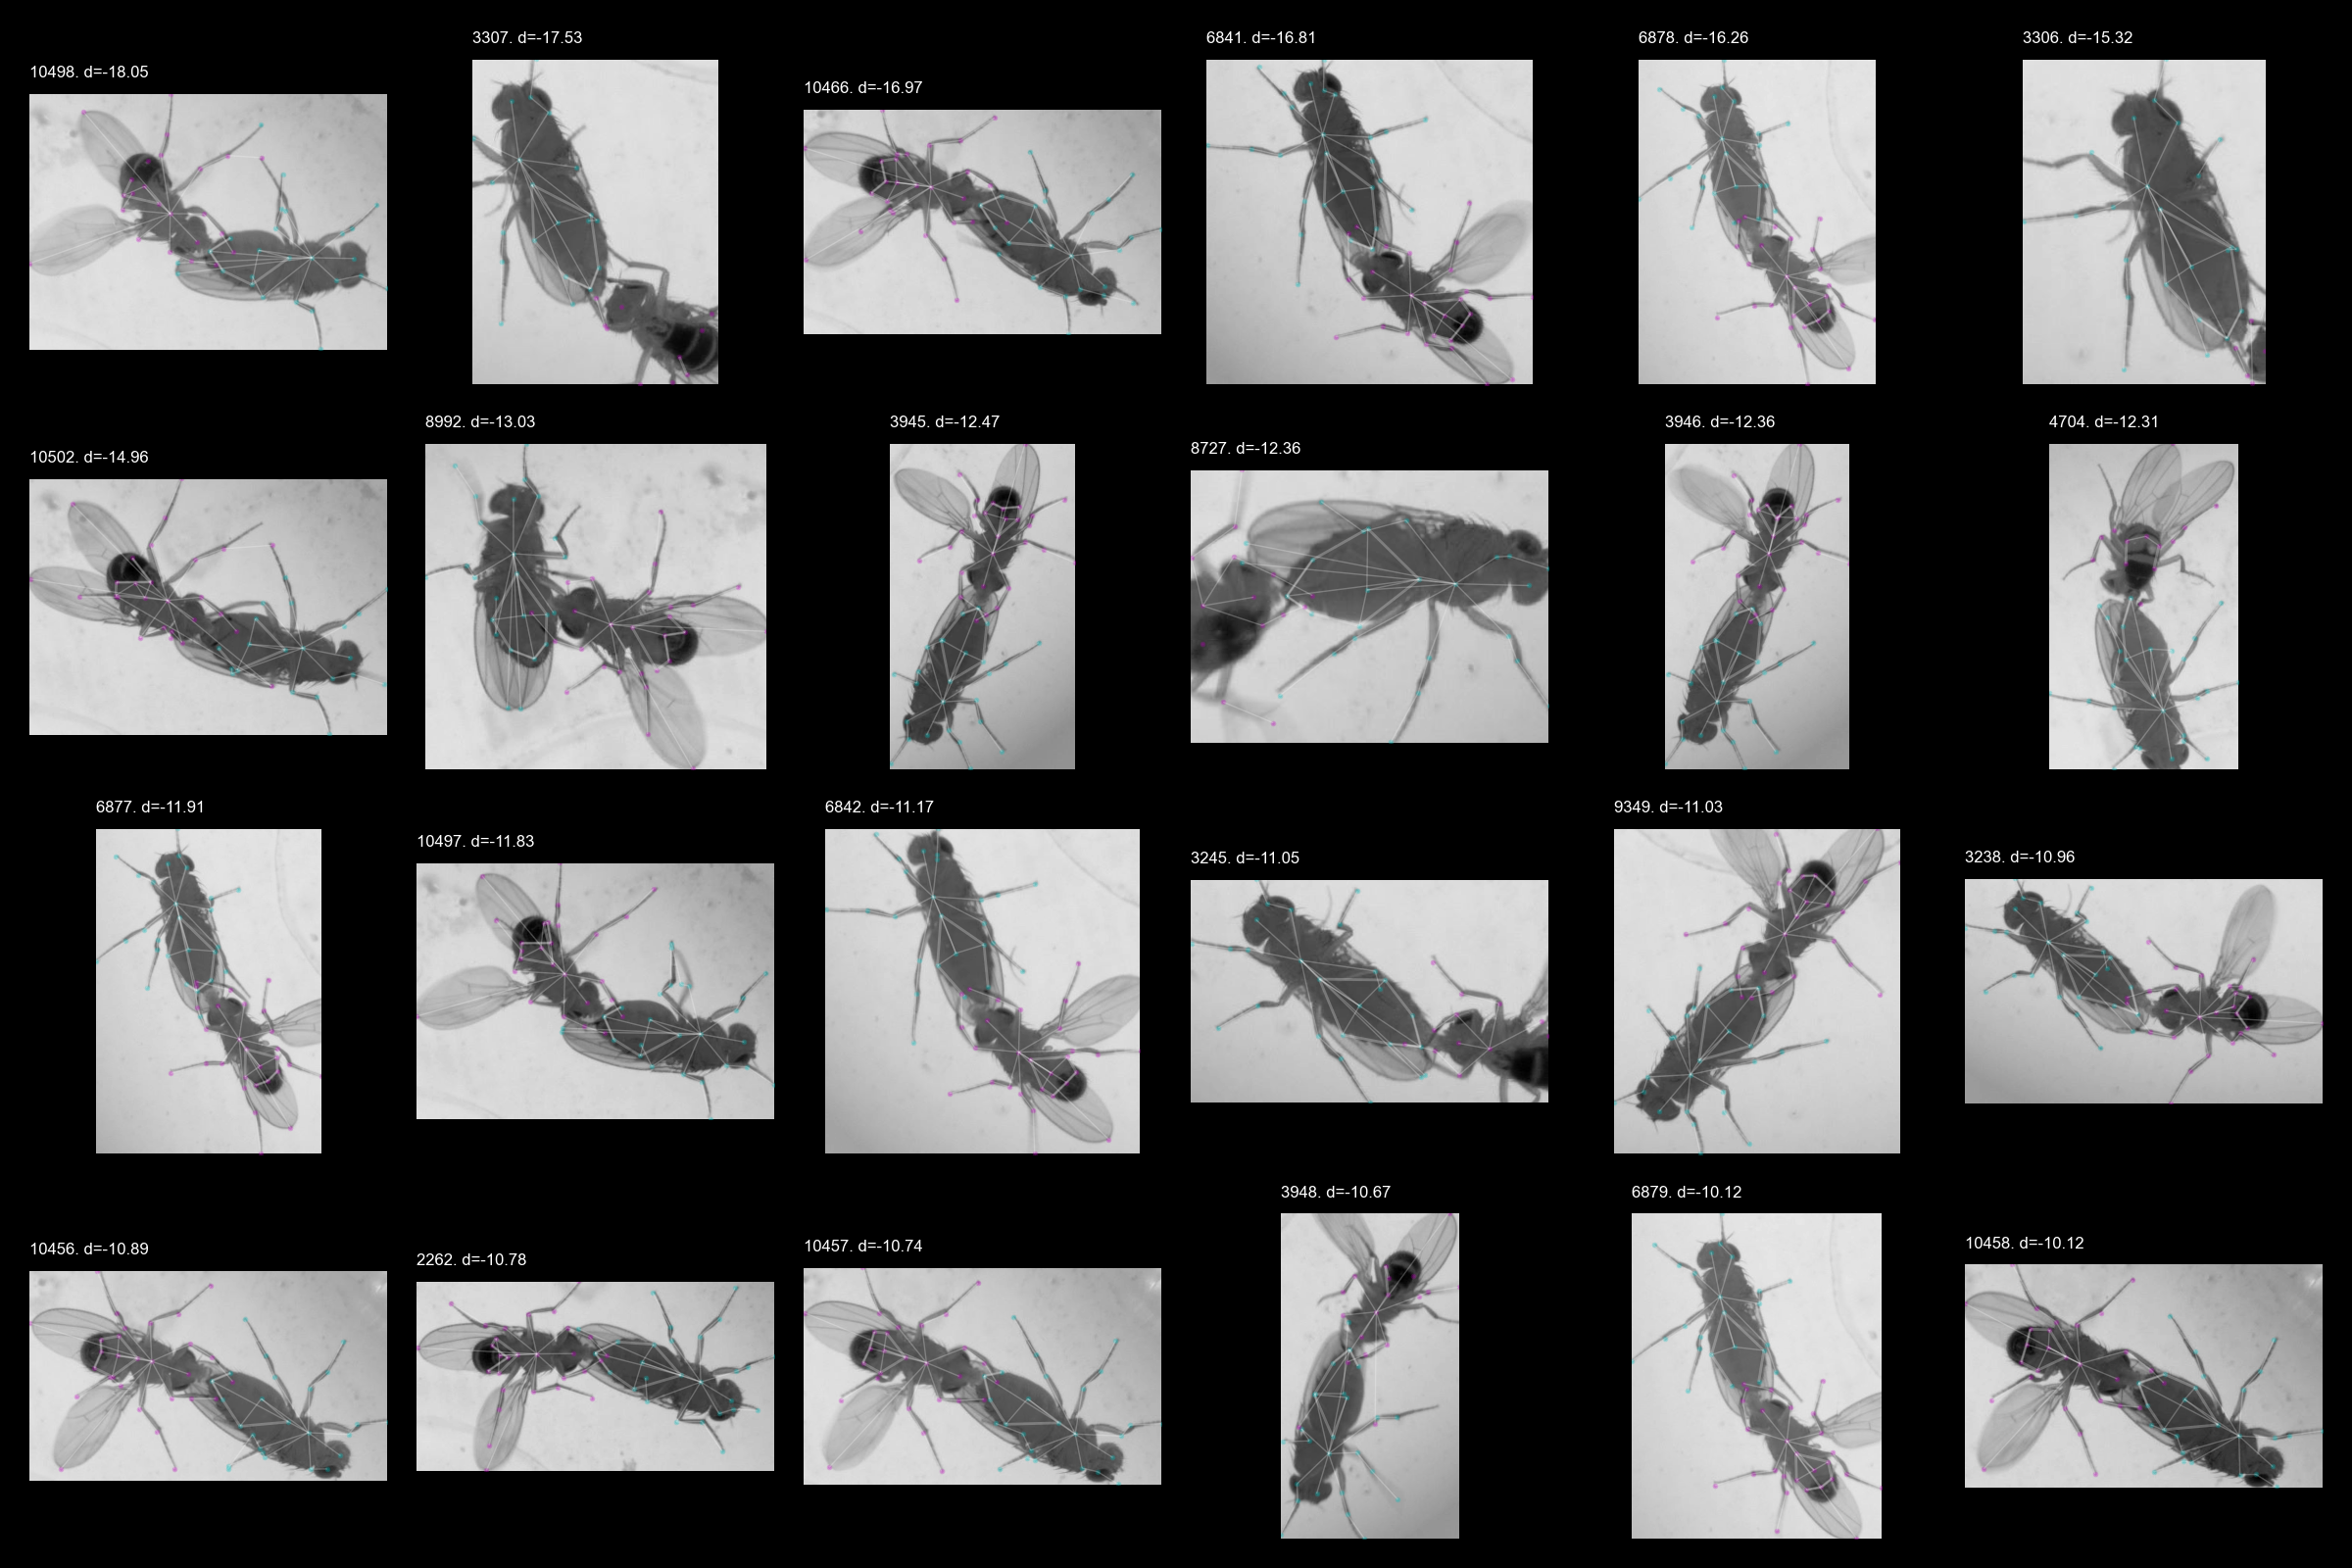

/Volumes/Julie/courtship-free-behavior/maDLCv2/figures/twotouch_outside-min-0-max-15-n24_frames.png


In [26]:
pcutoff=0.9 # keep this value HIGH, only include points that the network is confident about 
alphavalue=0.25
markersize=2

nr=4
nc=6
figname = 'twotouch_outside-min-{}-max-{}-n{}'.format(tap_thresh_lower, tap_thresh_upper, nr*nc)

fig, axn = pl.subplots(nr, nc, figsize=(nc*2, nr*2))
for ai, (ix, df_) in enumerate(sorted_two_touch.iterrows()):
    frame_ix = df_['frame']
    if ai>=(nr*nc):
        break
    ax=axn.flat[ai]
    cap.set(1, frame_ix)
    ret, im = cap.read()
    im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY) #COLOR_BGR2RGB)
    ax.imshow(im, cmap='gray')
    # skeletons
    for ind2plot in individuals:
        currcol = animal_colors[ind2plot]
        df = df0.loc(axis=1)[:, ind2plot]
        # plot bodyparts
        putil.plot_bodyparts(df, frame_ix, bodyparts2plot, ax=ax, pcutoff=pcutoff,
                             color=currcol, alpha=alphavalue, markersize=markersize)
        # get current frame coords
        xyp = dlc.get_valid_coords(df, pcutoff=pcutoff)
        coords = xyp[frame_ix]
        # plot skeletons
        putil.plot_skeleton(coords, inds=inds_ab, ax=ax, color=skeleton_color, alpha=alphavalue, lw=lw)
        putil.plot_skeleton(coords, inds=inds_og, ax=ax, color=skeleton_color, alpha=alphavalue, lw=skeleton_lw)
    # axes
    nx = int(np.nanmax(df0.xs("x", axis=1, level="coords").loc[frame_ix]))
    ny = int(np.nanmax(df0.xs("y", axis=1, level="coords").loc[frame_ix]))
    nx_min = int(np.nanmin(df0.xs("x", axis=1, level="coords").loc[frame_ix]))
    ny_min = int(np.nanmin(df0.xs("y", axis=1, level="coords").loc[frame_ix]))
    ax.set_xlim(nx_min, nx)
    ax.set_ylim(ny_min, ny)
    ax.set_aspect(1)
    ax.axis('off')
    ax.set_title('{}. d={:.2f}'.format(frame_ix, df_['distance']), loc='left', fontsize=6)
pl.tight_layout()

figpath = os.path.join(figdir, '{}_frames.png'.format(figname))
#pl.savefig(figpath) #curr_figid
print(figpath)

<IPython.core.display.Javascript object>


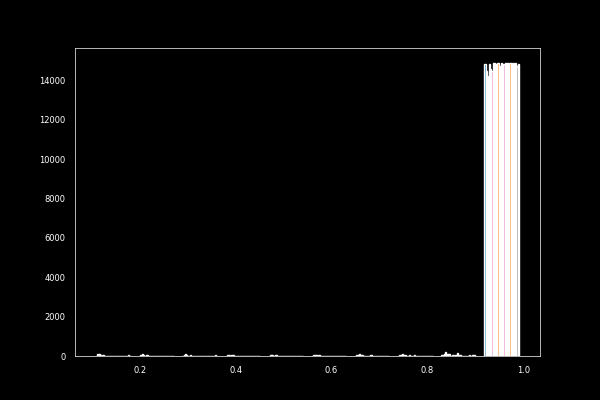

(array([[1.2000e+01, 4.0000e+00, 4.0000e+00, 5.0000e+00, 9.0000e+00,
         7.0000e+00, 1.4000e+01, 1.2000e+01, 3.5000e+01, 1.4809e+04],
        [1.1700e+02, 6.4000e+01, 5.0000e+01, 3.6000e+01, 4.5000e+01,
         4.4000e+01, 2.7000e+01, 3.7000e+01, 4.6000e+01, 1.4445e+04],
        [1.0700e+02, 8.1000e+01, 8.2000e+01, 7.2000e+01, 6.6000e+01,
         5.8000e+01, 6.8000e+01, 7.2000e+01, 1.0800e+02, 1.4197e+04],
        [7.0000e+01, 6.1000e+01, 5.8000e+01, 6.7000e+01, 7.0000e+01,
         6.4000e+01, 8.6000e+01, 1.0500e+02, 1.8700e+02, 1.4143e+04],
        [8.0000e+00, 8.0000e+00, 6.0000e+00, 2.0000e+00, 4.0000e+00,
         5.0000e+00, 7.0000e+00, 1.3000e+01, 1.0000e+01, 1.4848e+04],
        [3.0000e+01, 1.9000e+01, 2.0000e+01, 3.1000e+01, 2.9000e+01,
         3.3000e+01, 3.1000e+01, 5.6000e+01, 8.3000e+01, 1.4579e+04],
        [3.2000e+01, 3.3000e+01, 3.6000e+01, 4.2000e+01, 4.2000e+01,
         4.5000e+01, 4.5000e+01, 7.0000e+01, 8.7000e+01, 1.4479e+04],
        [5.0000e+00, 4.0000

In [437]:
df = df0.loc(axis=1)[:, ind2plot]
xyp = df.values.reshape((n_frames, -1, 3))

fig, ax =pl.subplots()
ax.hist(xyp[:, :, 2])